In [8]:
import pandas as pd
import struct
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl

In [2]:
with open('DataSets/MNIST/train-labels.idx1-ubyte', mode='rb') as file: # b is important -> binary
    fileContent = file.read()

lbl_magic = struct.unpack('>i',fileContent[:4])
lbl_count = struct.unpack('>i',fileContent[4:8])
print("Magic", lbl_magic, 'Count', lbl_count)
labels=[]
for iter in struct.iter_unpack('@B',fileContent[8:]):
    labels.append(iter)
print(len(labels))

Magic (2049,) Count (60000,)
60000


In [3]:
with open('DataSets/MNIST/train-images.idx3-ubyte', mode='rb') as file: # b is important -> binary
    fileContent = file.read()

img_magic = struct.unpack('>i',fileContent[:4])
img_count = struct.unpack('>i',fileContent[4:8])
n_rows = struct.unpack('>i',fileContent[8:12])[0]
n_cols = struct.unpack('>i',fileContent[12:16])[0]
remain_bytes = (len(fileContent)-16)
print("Magic", img_magic, 'Count', img_count, 'Rows', n_rows, 'Columns', n_cols)

fmt = 'B'*remain_bytes
pixels = n_rows*n_cols
images=[]
image_content=struct.unpack(fmt, fileContent[16:])
for i in range(0,len(image_content), pixels):
    img_pxls = []
    images.append(np.array(image_content[i:(i+pixels)]))
len(images)

Magic (2051,) Count (60000,) Rows 28 Columns 28


60000

In [4]:
mnist_img_with_labels = []
for i in range(len(images)):
    mnist_img_with_labels.append((images[i], labels[i][0]))
    

7


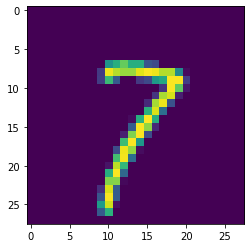

In [7]:
print(mnist_img_with_labels[11254][1])
plt.imshow(mnist_img_with_labels[11254][0].reshape(n_rows,n_cols))

In [11]:
pkl.dump(mnist_img_with_labels,open('DataSets/MNIST_IMG_WITH_LABELS.pkl','wb'))